In [1]:
import numpy as np
from gallery_probes_generator import GalleryProbesGenerator

In [2]:
data_generator = GalleryProbesGenerator(path_to_dataset='data/dataset1/', probes_length=200)

gallery_names, gallery_pictures = data_generator.get_gallery()
probe_names, probe_pictures = data_generator.get_merged_probes() #changer qd la methode get_probe_total ready

In [3]:
norms = { "L1":lambda x: np.sum(np.abs(x)),
	  "L2":lambda x: np.sum(x**2),
	  "inf":lambda x: np.max(np.abs(x))
	}

def compute_distance_1d(data, query, norm="L2"):
	norm_function = norms[norm]
	distances = np.zeros(shape=len(data), dtype=np.float32)
	for i, d in enumerate(data):
		distances[i] = norm_function(d-query)
	return distances

In [4]:
def compute_distance_2d(data, q, norm='L2'):
    total_array_q = np.zeros(dtype=object, shape=273)
    for i, person in enumerate(data):
        distances = compute_distance_1d(person, q, norm)
        total_array_q[i] = distances
    return total_array_q

In [5]:
def radius_search_bruteforce(data, q, radius, norm = 'L2'):
    distance_matrix = compute_distance_2d(data, q, norm)
    nn_list = []
    for i, person in enumerate(distance_matrix):
        for j, dist_pic in enumerate(person):
            if dist_pic <= radius:
                nn_list.append((i,j,dist_pic))
    return nn_list

In [6]:
from math import sqrt

def radius_opti(data):
    mean_total_list = []
    for i, row in enumerate(data):
        mean_row_list = []
        for j, element in enumerate(row):
            tmp = row
            if element.shape == (150,150):
                mean_row_list.append(np.mean(compute_distance_1d(np.delete(tmp, j, axis=0), element)))
        mean_row = np.mean(mean_row_list)
        mean_total_list.append(mean_row)
    mean_total = np.mean(mean_total_list)#moyenne de distance entre deux photos d'une meme pers
    std_total = sqrt(np.var(mean_total_list))#ecart type
    return mean_total + std_total #radius opti

In [7]:
radius_opti = radius_opti(gallery_pictures)

In [8]:
resultat_0 = radius_search_bruteforce(gallery_pictures, probe_pictures[0], radius_opti)
resultat_88 = radius_search_bruteforce(gallery_pictures, probe_pictures[88], radius_opti)
resultat_150 = radius_search_bruteforce(gallery_pictures, probe_pictures[150], radius_opti)

kdjone


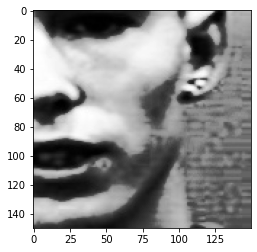

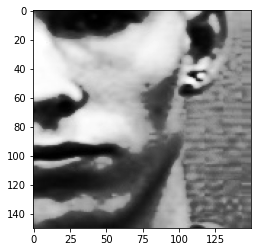

In [9]:
import matplotlib.pyplot as plt

print(probe_names[0])
index_person_0 = resultat_0[0][0]
index_pic_0 = resultat_0[0][1]
probe_face = plt.imshow(probe_pictures[0],cmap="gray")
plt.show()
gallery_gallery = plt.imshow(gallery_pictures[index_person_0][index_pic_0],cmap="gray")
plt.show()

In [10]:
from eigenface_generator import EigenfaceGenerator

eigenfacegenerator = EigenfaceGenerator(data_generator=data_generator, components=500)
gallery_eigenface_pictures = eigenfacegenerator.get_gallery_picture_eigenface()
probes_eigenface_pictures = eigenfacegenerator.get_probes_pictures_eigenface()
eigen_faces, mean_face = eigenfacegenerator.get_eigenfaces()


In [39]:
def radius_opti_eigen(data):
    mean_person_list = []
    for j, person in enumerate(data):
        mean_row_list = []
        for i, row in enumerate(data[j]):
            tmp = row
            mean_row_list.append(np.mean(compute_distance_1d(np.delete(tmp,i), row[i])))
        mean_person_list.append(np.mean(mean_row_list))
    mean_total = np.mean(mean_person_list)
    std_total = sqrt(np.var(mean_person_list))#ecart type
    return 10*mean_total #radius opti

In [41]:
#test sur les données acp
radius_opti_acp = radius_opti_eigen(gallery_eigenface_pictures)
print(radius_opti_acp)

27980900.0


In [42]:
resultat_0_acp = radius_search_bruteforce(gallery_eigenface_pictures, probes_eigenface_pictures[0], radius_opti_acp)
resultat_88_acp = radius_search_bruteforce(gallery_eigenface_pictures, probes_eigenface_pictures[88], radius_opti_acp)
resultat_150_acp = radius_search_bruteforce(gallery_eigenface_pictures, probes_eigenface_pictures[150], radius_opti_acp)

In [43]:
print(resultat_88_acp)

[(24, 4, 7984204.5), (24, 6, 8829261.0), (24, 8, 7690954.5), (24, 12, 25237940.0), (24, 14, 8210714.0)]


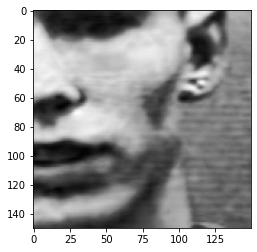

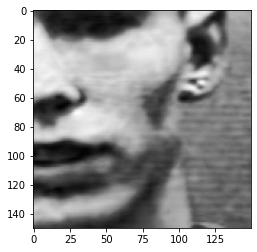

In [48]:
created_picture_probe = np.reshape(eigenfacegenerator.get_picture_from_coefs(probes_eigenface_pictures[0]), (-1, 150))
created_pic = plt.imshow(created_picture_probe, cmap="gray")
plt.show()

index_person_acp = resultat_88_acp[0][0]
index_pic_acp = resultat_88_acp[3][1]
created_picture_gallery = np.reshape(eigenfacegenerator.get_picture_from_coefs(gallery_eigenface_pictures[index_person_acp][index_pic_acp]), (-1, 150))
created_pic = plt.imshow(created_picture_probe, cmap="gray")
plt.show()

